In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [37]:
price_2 = pd.read_csv('data/prices_round_2_day_-1.csv', sep=';')
price_1 = pd.read_csv('data/prices_round_2_day_0.csv', sep=';')
price_0 = pd.read_csv('data/prices_round_2_day_1.csv', sep=';')
all_ob = pd.read_csv('data/website_orderbook.csv', sep=';')

df = pd.concat([price_2, price_1, price_0]).reset_index(drop=True)
ob = all_ob[all_ob['product'] == 'ORCHIDS']

print(df.tail())

       timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
29998     999600  1036.25             0.9            9.5           -5.0   
29999     999700  1036.25             0.9            9.5           -5.0   
30000     999800  1036.25             0.9            9.5           -5.0   
30001     999900  1034.25             0.9            9.5           -5.0   
30002    1000000  1035.25             0.9            9.5           -5.0   

        SUNLIGHT  HUMIDITY  DAY  
29998  2299.9436  69.93549    1  
29999  2299.9556  69.95153    1  
30000  2299.9690  69.96762    1  
30001  2299.9840  69.98378    1  
30002  2300.0000  70.00000    1  


In [12]:
for column in df.columns:
    print(column)
    print(df[column].describe())
    print()

print("OB MID_PRICE")
print(ob['mid_price'].describe())

timestamp
count      30003.000000
mean      500000.000000
std       288708.812038
min            0.000000
25%       250000.000000
50%       500000.000000
75%       750000.000000
max      1000000.000000
Name: timestamp, dtype: float64

ORCHIDS
count    30003.000000
mean      1103.617855
std         81.975222
min        960.750000
25%       1039.250000
50%       1081.750000
75%       1195.750000
max       1257.250000
Name: ORCHIDS, dtype: float64

TRANSPORT_FEES
count    30003.000000
mean         1.237043
std          0.287521
min          0.700000
25%          1.000000
50%          1.300000
75%          1.400000
max          2.100000
Name: TRANSPORT_FEES, dtype: float64

EXPORT_TARIFF
count    30003.000000
mean         9.728044
std          1.368582
min          7.500000
25%          8.500000
50%          9.500000
75%         10.500000
max         19.500000
Name: EXPORT_TARIFF, dtype: float64

IMPORT_TARIFF
count    30003.000000
mean        -3.405143
std          1.235526
min         -6

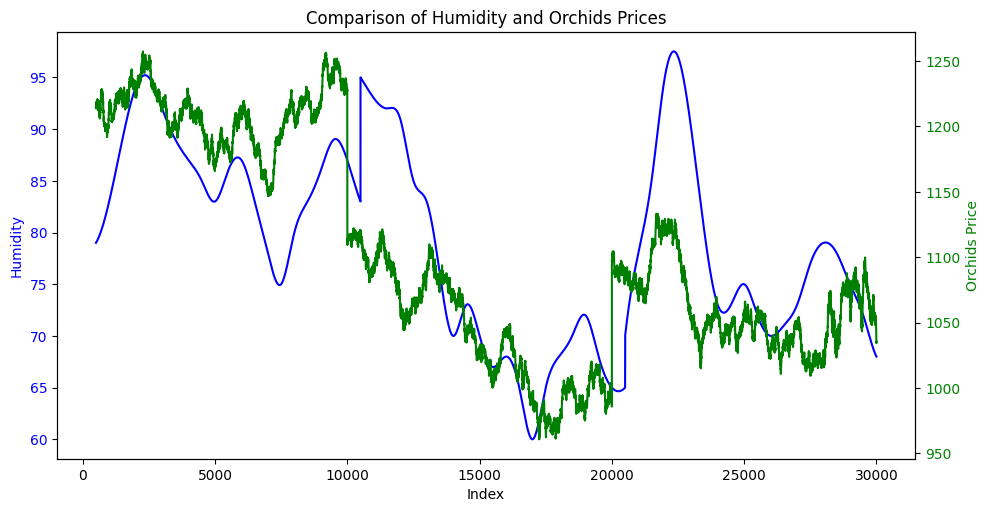

In [76]:
# HUMIDITY (WITH SHIFT) VS PRICE
shift = 500

data = pd.DataFrame()
data['price'] = df['ORCHIDS']
data['humidity'] = df['HUMIDITY'].shift(shift)
data.dropna(inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 5))  # Create a figure and one subplot

# Plot HUMIDITY on the primary y-axis
ax1.plot(data.index, data['humidity'], label='Humidity', color='b')  # Plot Humidity on primary y-axis
ax1.set_xlabel('Index')  # Set the x-axis label
ax1.set_ylabel('Humidity', color='b')  # Set the y-axis label for HUMIDITY
ax1.tick_params(axis='y', labelcolor='b')  # Set the y-axis tick color for HUMIDITY

# Create a secondary y-axis for ORCHIDS prices
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(data.index, data['price'], label='Orchids Price', color='g')  # Plot Orchids Price on secondary y-axis
ax2.set_ylabel('Orchids Price', color='g')  # Set the y-axis label for ORCHIDS
ax2.tick_params(axis='y', labelcolor='g')  # Set the y-axis tick color for ORCHIDS

# Adjust layout and title
fig.tight_layout()  # Adjust the layout
plt.title('Comparison of Humidity and Orchids Prices')  # Set a more appropriate title
plt.show()

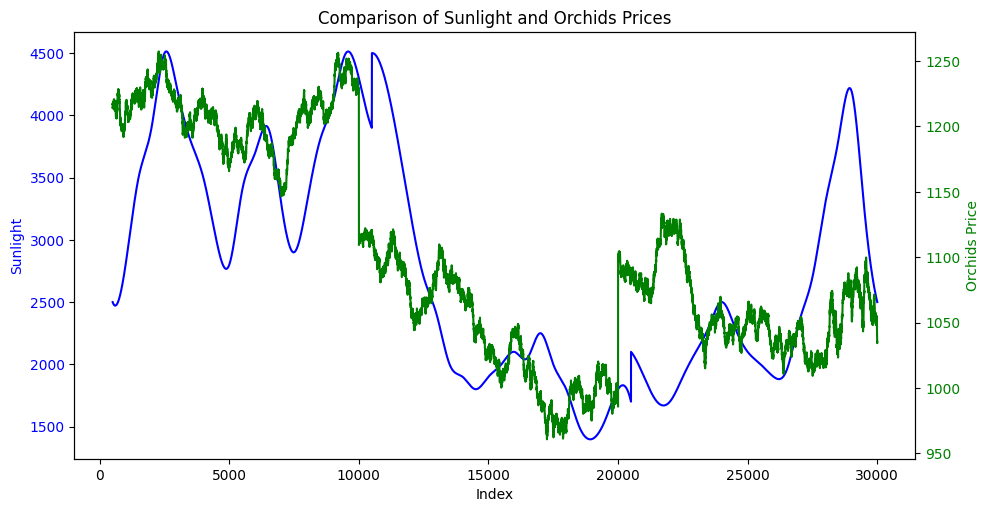

In [77]:
# SUNLIGHT (WITH SHIFT) VS PRICE
shift = 500

# Sample data setup (ensure you have the 'df' DataFrame loaded with 'ORCHIDS' and 'SUNLIGHT' columns)
data = pd.DataFrame()
data['price'] = df['ORCHIDS']
data['sunlight'] = df['SUNLIGHT'].shift(shift)  # Adjusting 'SUNLIGHT' data by shifting it as before
data.dropna(inplace=True)  # Dropping rows where any data may be missing after the shift

fig, ax1 = plt.subplots(figsize=(10, 5))  # Create a figure and one subplot

# Plot SUNLIGHT on the primary y-axis
ax1.plot(data.index, data['sunlight'], label='Sunlight', color='b')  # Plot Sunlight on primary y-axis
ax1.set_xlabel('Index')  # Set the x-axis label
ax1.set_ylabel('Sunlight', color='b')  # Set the y-axis label for SUNLIGHT
ax1.tick_params(axis='y', labelcolor='b')  # Set the y-axis tick color for SUNLIGHT

# Create a secondary y-axis for ORCHIDS prices
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(data.index, data['price'], label='Orchids Price', color='g')  # Plot Orchids Price on secondary y-axis
ax2.set_ylabel('Orchids Price', color='g')  # Set the y-axis label for ORCHIDS
ax2.tick_params(axis='y', labelcolor='g')  # Set the y-axis tick color for ORCHIDS

# Adjust layout and title
fig.tight_layout()  # Adjust the layout
plt.title('Comparison of Sunlight and Orchids Prices')  # Set a more appropriate title
plt.show()

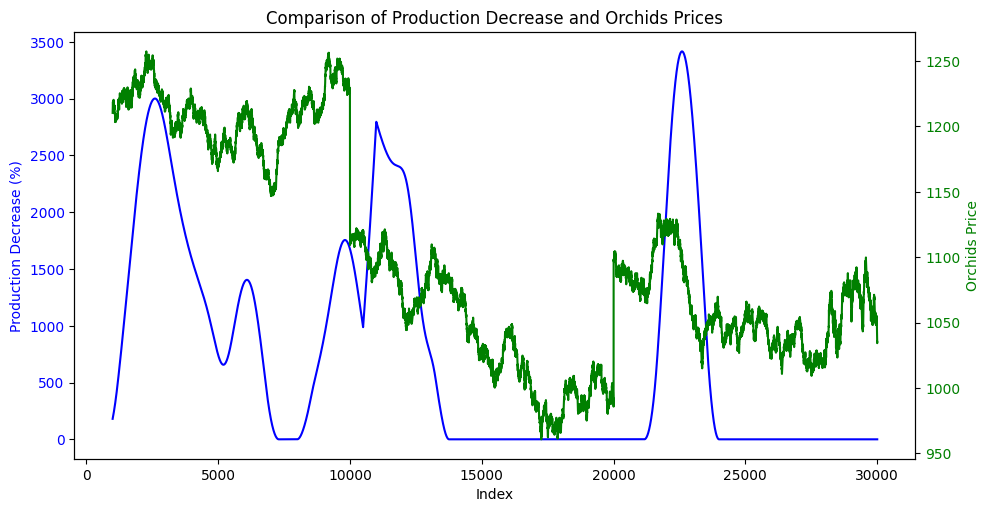

In [84]:
# HUMIDITY VS PRODUCTION DECREASE VS PRICE
shift = 500
window = 500

# Sample data setup (ensure you have the 'df' DataFrame loaded with 'ORCHIDS', 'SUNLIGHT', and 'HUMIDITY' columns)
data = pd.DataFrame()
data['price'] = df['ORCHIDS']

# Calculate production decrease due to humidity not being in the ideal range, adjust by -4% for every 10 minutes of insufficient sunlight
data['prod_dec'] = np.where((df["HUMIDITY"] < 60) | (df["HUMIDITY"] > 80), abs(df["HUMIDITY"] - 70) / 5.0 * 2.0 - 4, 0)
data['prod_dec'] = data['prod_dec'].shift(shift).rolling(window=window).mean()  # Shift if necessary based on your specific needs
data.dropna(inplace=True)  # Dropping rows where any data may be missing after the shift

fig, ax1 = plt.subplots(figsize=(10, 5))  # Create a figure and one subplot

# Plot production decrease on the primary y-axis
ax1.plot(data.index, data['prod_dec'], label='Production Decrease', color='b')  # Plot Production Decrease on primary y-axis
ax1.set_xlabel('Index')  # Set the x-axis label
ax1.set_ylabel('Production Decrease (%)', color='b')  # Set the y-axis label for production decrease
ax1.tick_params(axis='y', labelcolor='b')  # Set the y-axis tick color for production decrease

# Create a secondary y-axis for ORCHIDS prices
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(data.index, data['price'], label='Orchids Price', color='g')  # Plot Orchids Price on secondary y-axis
ax2.set_ylabel('Orchids Price', color='g')  # Set the y-axis label for ORCHIDS
ax2.tick_params(axis='y', labelcolor='g')  # Set the y-axis tick color for ORCHIDS

# Adjust layout and title
fig.tight_layout()  # Adjust the layout
plt.title('Comparison of Production Decrease and Orchids Prices')  # Set a more appropriate title
plt.show()